# How does noise affect the peaklet transform?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import peaklets as pk
%matplotlib notebook

In [2]:
# A signal to analyze
dt = 2          # (s) cadence
duration = 300  # (s) a sounding rocket's worth
t = np.linspace(-150,150,151) # (s)
background = 100
pulse_counts = 15000
fwhm = 20
std = fwhm / (2*np.sqrt(2*np.log(2)))
true = np.exp(-t**2/(2*std**2))
true *= pulse_counts/np.sum(true)
true += background
noisy = np.random.poisson(true)

<IPython.core.display.Javascript object>


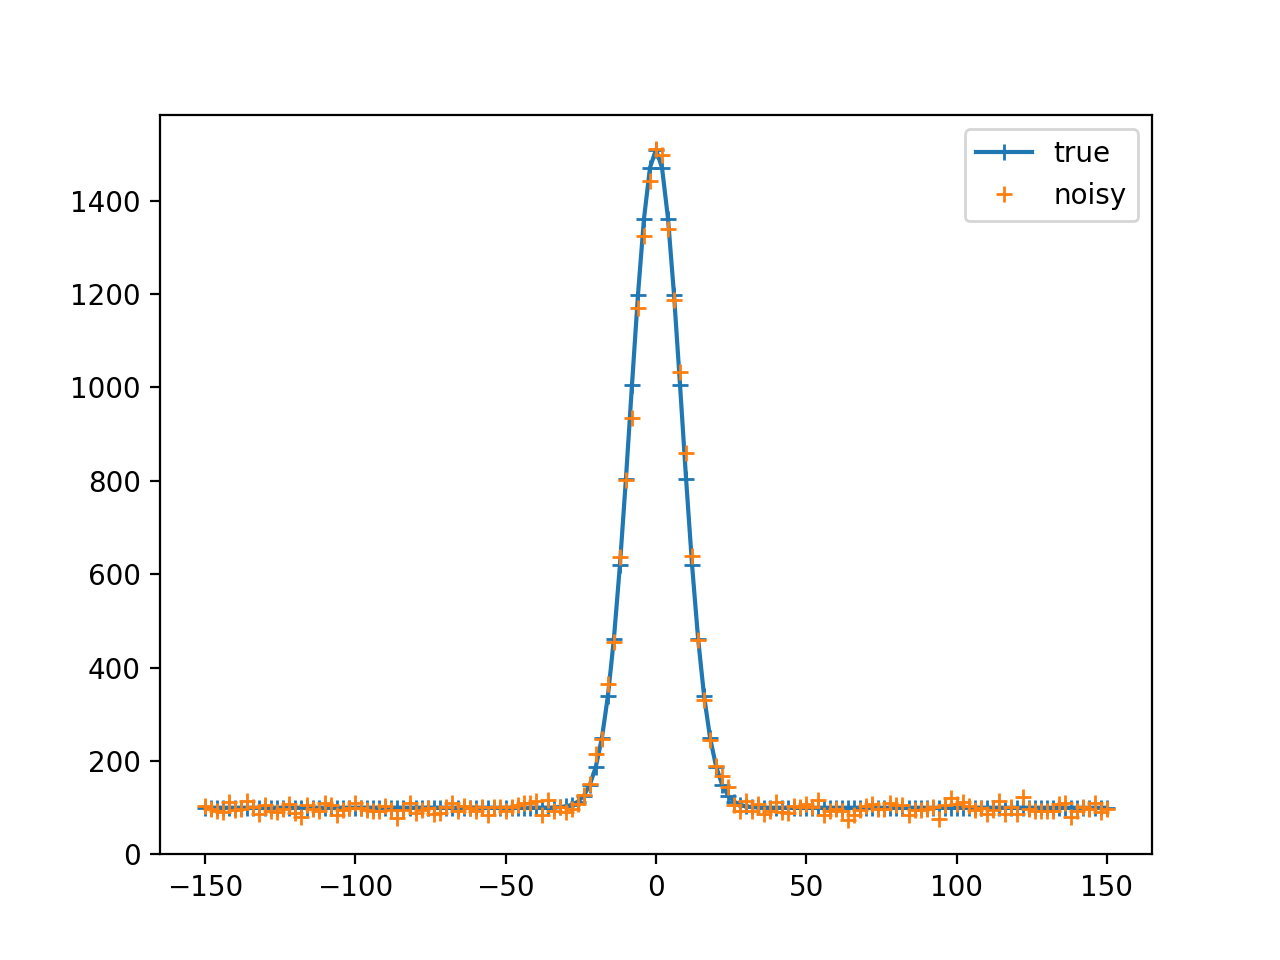

In [3]:
plt.figure()
plt.plot(t, true, '+-', label='true')
plt.plot(t, noisy, '+', label='noisy')
plt.ylim(bottom=0)
plt.legend()
plt.show();

In [4]:
pktrue = pk.pkxform(true, peaklet_func=pk.pk_parabola2)
pktrue_spec = np.sum( pktrue.xform, axis=1 )
pknoisy = pk.pkxform(noisy, peaklet_func=pk.pk_parabola2)
pknoisy_spec = np.sum( pknoisy.xform, axis=1 )

fwhm = pktrue.scales * dt  # approx fwhm for each scale
plt.figure()
plt.semilogx(fwhm, pktrue_spec, label='true')
plt.plot(fwhm, pknoisy_spec, label='noised')
plt.title('Peaklet Power Spectrum')
plt.ylabel('mean power per pixel (counts)')
plt.xlabel('timescale (s, FWHM)')
plt.legend()
plt.show();

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
No implementation of function Function(<built-in function isub>) found for signature:
 
 >>> isub(array(int64, 1d, C), array(float64, 1d, C))
 
There are 12 candidate implementations:
  - Of which 2 did not match due to:
  Overload in function 'NumpyRulesInplaceArrayOperator.generic': File: numba/core/typing/npydecl.py: Line 243.
    With argument(s): '(array(int64, 1d, C), array(float64, 1d, C))':
   Rejected as the implementation raised a specific error:
     AttributeError: 'NoneType' object has no attribute 'args'
  raised from /Users/kankel/anaconda3/envs/pkdev/lib/python3.11/site-packages/numba/core/typing/npydecl.py:254
  - Of which 2 did not match due to:
  Operator Overload in function 'isub': File: unknown: Line unknown.
    With argument(s): '(array(int64, 1d, C), array(float64, 1d, C))':
   No match for registered cases:
    * (int64, int64) -> int64
    * (int64, uint64) -> int64
    * (uint64, int64) -> int64
    * (uint64, uint64) -> uint64
    * (float32, float32) -> float32
    * (float64, float64) -> float64
    * (complex64, complex64) -> complex64
    * (complex128, complex128) -> complex128
  - Of which 6 did not match due to:
  Overload of function 'isub': File: <numerous>: Line N/A.
    With argument(s): '(array(int64, 1d, C), array(float64, 1d, C))':
   No match.
  - Of which 2 did not match due to:
  Overload in function 'gen_operator_impl.<locals>._ol_set_operator': File: numba/cpython/setobj.py: Line 1508.
    With argument(s): '(array(int64, 1d, C), array(float64, 1d, C))':
   Rejected as the implementation raised a specific error:
     TypingError: All arguments must be Sets, got (Array(int64, 1, 'C', False, aligned=True), Array(float64, 1, 'C', False, aligned=True))
  raised from /Users/kankel/anaconda3/envs/pkdev/lib/python3.11/site-packages/numba/cpython/setobj.py:108

During: typing of intrinsic-call at /Users/kankel/Documents/physics/solar/peaklets/peaklets-git/peaklets/peaklets.py (270)

File "../peaklets/peaklets.py", line 270:
def _pqpt(
    <source elided>

            residual -= transform[i, k, :]
            ^


In [ ]:
print(pktrue.scales)